In [3]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Connect to MySQL using PyMySQL
db_connection = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="AnIsH@123#",  # Replace with your MySQL password
    database="healthcare"
)

cursor = db_connection.cursor()




In [4]:
# Fetch patient details and health metrics
query = """
SELECT p.name, p.age, p.gender, p.weight, p.height, h.date_of_record, h.blood_pressure, h.heart_rate, h.cholesterol
FROM patients p
JOIN health_metrics h ON p.patient_id = h.patient_id;
"""
cursor.execute(query)
data = cursor.fetchall()

print(data)

(('John Doe', 45, 'Male', Decimal('78.50'), Decimal('175.00'), datetime.date(2024, 10, 1), '130/85', 78, Decimal('5.60')), ('Jane Smith', 37, 'Female', Decimal('65.20'), Decimal('165.00'), datetime.date(2024, 10, 2), '120/80', 70, Decimal('6.20')), ('Alice Brown', 50, 'Female', Decimal('72.30'), Decimal('160.00'), datetime.date(2024, 10, 3), '140/90', 85, Decimal('7.10')), ('Patient 4', 53, 'Female', Decimal('84.05'), Decimal('150.63'), datetime.date(2024, 10, 1), '135/88', 80, Decimal('5.80')), ('Patient 5', 39, 'Male', Decimal('72.92'), Decimal('158.35'), datetime.date(2024, 10, 2), '130/85', 75, Decimal('6.50')), ('Patient 6', 42, 'Male', Decimal('64.36'), Decimal('171.62'), datetime.date(2024, 10, 3), '145/92', 85, Decimal('7.20')), ('Patient 7', 38, 'Male', Decimal('69.93'), Decimal('167.89'), datetime.date(2024, 10, 4), '150/95', 78, Decimal('6.00')), ('Patient 8', 37, 'Male', Decimal('71.20'), Decimal('156.13'), datetime.date(2024, 10, 5), '120/80', 72, Decimal('5.30')), ('Patie

In [5]:
# Convert the fetched data into a Pandas DataFrame
df = pd.DataFrame(data, columns=['name', 'age', 'gender', 'weight', 'height', 'date_of_record', 'blood_pressure', 'heart_rate', 'cholesterol'])
print(df)
# Close the database connection
cursor.close()
db_connection.close()

# Data Preprocessing and Visualization (Assumed done before)

           name  age  gender weight  height date_of_record blood_pressure  \
0      John Doe   45    Male  78.50  175.00     2024-10-01         130/85   
1    Jane Smith   37  Female  65.20  165.00     2024-10-02         120/80   
2   Alice Brown   50  Female  72.30  160.00     2024-10-03         140/90   
3     Patient 4   53  Female  84.05  150.63     2024-10-01         135/88   
4     Patient 5   39    Male  72.92  158.35     2024-10-02         130/85   
5     Patient 6   42    Male  64.36  171.62     2024-10-03         145/92   
6     Patient 7   38    Male  69.93  167.89     2024-10-04         150/95   
7     Patient 8   37    Male  71.20  156.13     2024-10-05         120/80   
8     Patient 9   35    Male  97.20  172.96     2024-10-06         130/83   
9    Patient 10   31  Female  72.79  178.25     2024-10-07         125/82   
10   Patient 11   52  Female  73.94  179.55     2024-10-08         140/90   
11   Patient 12   56    Male  83.73  168.75     2024-10-09         135/88   

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            36 non-null     object
 1   age             36 non-null     int64 
 2   gender          36 non-null     object
 3   weight          36 non-null     object
 4   height          36 non-null     object
 5   date_of_record  36 non-null     object
 6   blood_pressure  36 non-null     object
 7   heart_rate      36 non-null     int64 
 8   cholesterol     36 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.7+ KB


In [6]:
df['date_of_record'] = pd.to_datetime(df['date_of_record'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            36 non-null     object        
 1   age             36 non-null     int64         
 2   gender          36 non-null     object        
 3   weight          36 non-null     object        
 4   height          36 non-null     object        
 5   date_of_record  36 non-null     datetime64[ns]
 6   blood_pressure  36 non-null     object        
 7   heart_rate      36 non-null     int64         
 8   cholesterol     36 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 2.7+ KB


In [123]:
# Convert relevant columns to float
df['weight'] = df['weight'].astype(float)
df['height'] = df['height'].astype(float)
df['cholesterol'] = df['cholesterol'].astype(float)

# Calculate BMI for each patient
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
print(df.bmi)


0     25.632653
1     23.948577
2     28.242187
3     37.043735
4     29.081080
5     21.851449
6     24.809263
7     29.208367
8     32.491885
9     22.909343
10    22.935522
11    29.403128
12    24.519338
13    25.738354
14    33.645813
15    33.616488
16    25.762967
17    29.622882
18    38.451485
19    29.284358
20    32.232069
21    23.504252
22    22.150921
23    22.989248
24    28.981507
25    25.351862
26    30.871437
27    21.101345
28    26.110931
29    41.553590
30    31.605941
31    26.119789
32    32.135446
33    30.628756
34    28.952734
35    39.250738
Name: bmi, dtype: float64


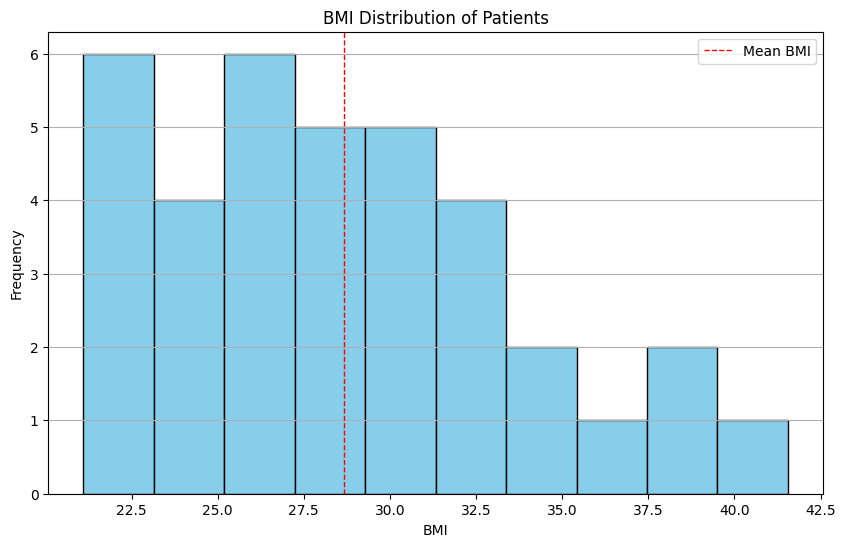

In [124]:
# Plotting the BMI distribution
plt.figure(figsize=(10, 6))
plt.hist(df['bmi'], bins=10, color='skyblue', edgecolor='black')
plt.title('BMI Distribution of Patients')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.axvline(df['bmi'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean BMI')
plt.legend()
plt.show()

In [66]:
# Calculate BMI
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Print and plot BMI
print("BMI for each patient:\n", df[['name', 'weight', 'height', 'bmi']])


BMI for each patient:
            name weight  height                            bmi
0      John Doe  78.50  175.00  25.63265306122448979591836735
1    Jane Smith  65.20  165.00  23.94857667584940312213039486
2   Alice Brown  72.30  160.00                     28.2421875
3     Patient 4  84.05  150.63  37.04373473232336113790666688
4     Patient 5  72.92  158.35  29.08107956129923272331328891
5     Patient 6  64.36  171.62  21.85144896088890770880957394
6     Patient 7  69.93  167.89  24.80926339934639706434572489
7     Patient 8  71.20  156.13  29.20836682364536589220613662
8     Patient 9  97.20  172.96  32.49188531878096222619101613
9    Patient 10  72.79  178.25  22.90934341000336369841591442
10   Patient 11  73.94  179.55  22.93552191689347444231730972
11   Patient 12  83.73  168.75  29.40312757201646090534979424
12   Patient 13  69.36  168.19  24.51933816268376543122655999
13   Patient 14  67.04  161.39  25.73835356489883811566518934
14   Patient 15  77.49  151.76  33.645812868249

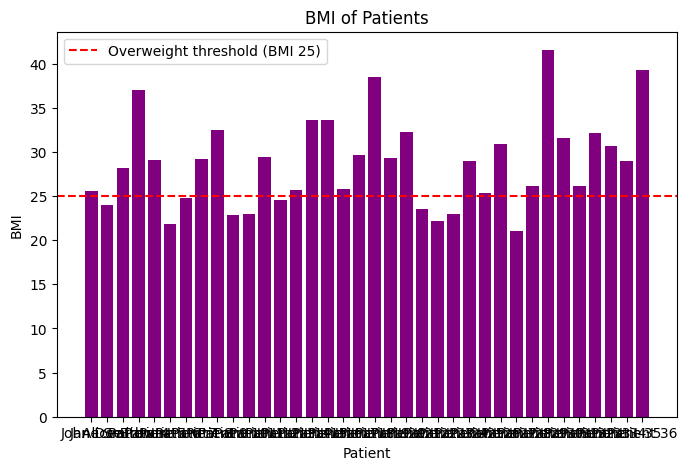

In [67]:

plt.figure(figsize=(8, 5))
plt.bar(df['name'], df['bmi'], color='purple')
plt.title('BMI of Patients')
plt.xlabel('Patient')
plt.ylabel('BMI')
plt.axhline(y=25, color='r', linestyle='--', label='Overweight threshold (BMI 25)')
plt.legend()
plt.show()


In [94]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the MySQL database
db_connection = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="AnIsH@123#",  # Replace with your MySQL password
    database="healthcare"
)

cursor = db_connection.cursor()

# Step 2: Fetch data from MySQL
query = """
SELECT p.patient_id, p.name, p.weight, p.height
FROM patients p;
"""
cursor.execute(query)
data = cursor.fetchall()

# Check the data fetched
print("Data Fetched from Database:\n", data)

# Step 3: Convert the data into a Pandas DataFrame
# Ensure that we only create a DataFrame with the columns we are fetching
df = pd.DataFrame(data, columns=['patient_id', 'name', 'weight', 'height'])
cursor.close()
db_connection.close()
# Check if the DataFrame has the expected columns
print("DataFrame Columns: ", df.columns)

# Calculate BMI for each patient
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Print BMI for each patient
print("BMI for each patient:\n", df[['patient_id', 'name', 'weight', 'height', 'bmi']])


Data Fetched from Database:
 ((1, 'John Doe', Decimal('78.50'), Decimal('175.00')), (2, 'Jane Smith', Decimal('65.20'), Decimal('165.00')), (3, 'Alice Brown', Decimal('72.30'), Decimal('160.00')), (4, 'Patient 4', Decimal('84.05'), Decimal('150.63')), (5, 'Patient 5', Decimal('72.92'), Decimal('158.35')), (6, 'Patient 6', Decimal('64.36'), Decimal('171.62')), (7, 'Patient 7', Decimal('69.93'), Decimal('167.89')), (8, 'Patient 8', Decimal('71.20'), Decimal('156.13')), (9, 'Patient 9', Decimal('97.20'), Decimal('172.96')), (10, 'Patient 10', Decimal('72.79'), Decimal('178.25')), (11, 'Patient 11', Decimal('73.94'), Decimal('179.55')), (12, 'Patient 12', Decimal('83.73'), Decimal('168.75')), (13, 'Patient 13', Decimal('69.36'), Decimal('168.19')), (14, 'Patient 14', Decimal('67.04'), Decimal('161.39')), (15, 'Patient 15', Decimal('77.49'), Decimal('151.76')), (16, 'Patient 16', Decimal('89.02'), Decimal('162.73')), (17, 'Patient 17', Decimal('76.91'), Decimal('172.78')), (18, 'Patient 18'

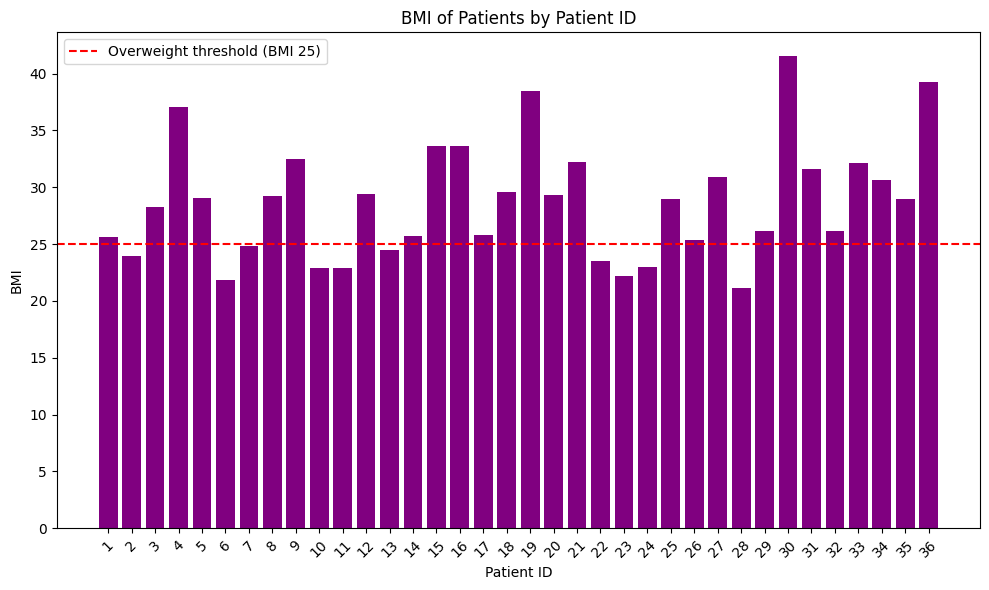

In [73]:
# Plotting BMI with patient_id on the x-axis
plt.figure(figsize=(10, 6))
plt.bar(df['patient_id'].astype(str), df['bmi'], color='purple')  # Convert patient_id to string for plotting
plt.title('BMI of Patients by Patient ID')
plt.xlabel('Patient ID')
plt.ylabel('BMI')
plt.axhline(y=25, color='r', linestyle='--', label='Overweight threshold (BMI 25)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


In [126]:
print(df.columns)


Index(['name', 'age', 'gender', 'weight', 'height', 'date_of_record',
       'blood_pressure', 'heart_rate', 'cholesterol', 'bmi'],
      dtype='object')


Non-numeric columns: Index(['name', 'gender', 'blood_pressure'], dtype='object')


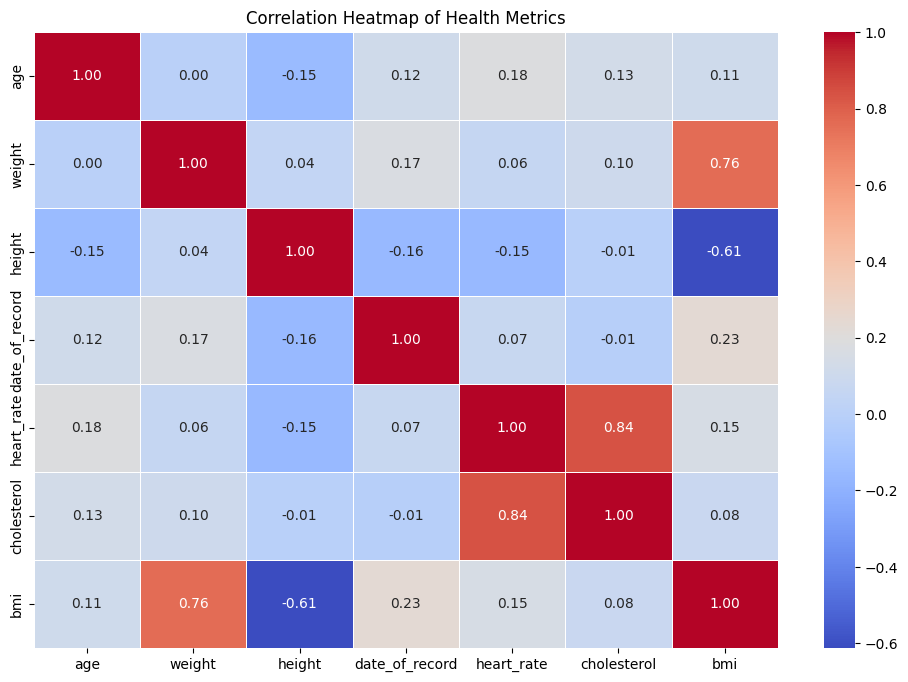

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame (Assuming df is already defined)
# df = pd.read_csv('your_file.csv')  # Example of loading data

# Step 1: Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Step 2: Drop non-numeric columns or convert them
# If you want to drop them
df_numeric = df.drop(columns=non_numeric_columns)

# If you want to convert specific columns to numeric (if applicable)
# df['some_column'] = pd.to_numeric(df['some_column'], errors='coerce')

# Step 3: Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Step 4: Create the heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Health Metrics')
plt.show()


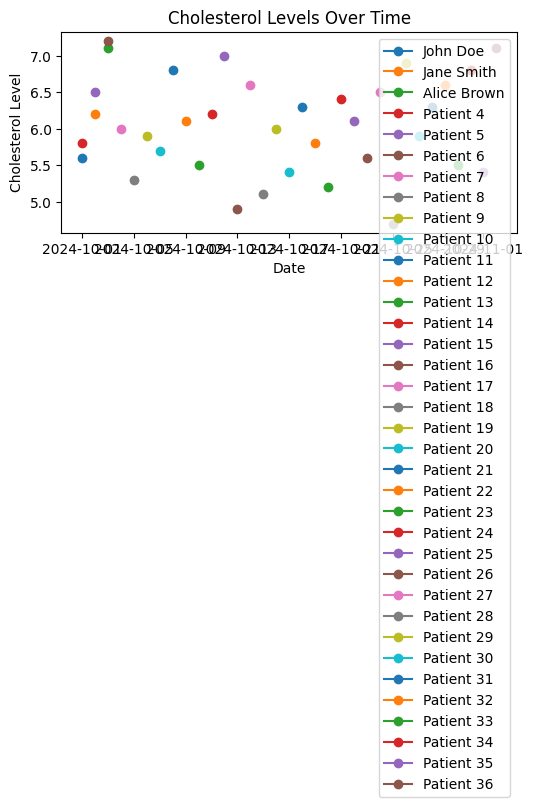

In [117]:
plt.figure(figsize=(20, 12))
plt.subplot(4, 3, 2)
for name in df['name'].unique():
    patient_data = df[df['name'] == name]
    plt.plot(patient_data['date_of_record'], patient_data['cholesterol'], marker='o', label=name)

plt.title('Cholesterol Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Cholesterol Level')
plt.legend()

C:\Users\anish rane\AppData\Local\Temp\ipykernel_16872\4146644537.py:25: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()  # Automatically adjust subplot parameters for a clean layout


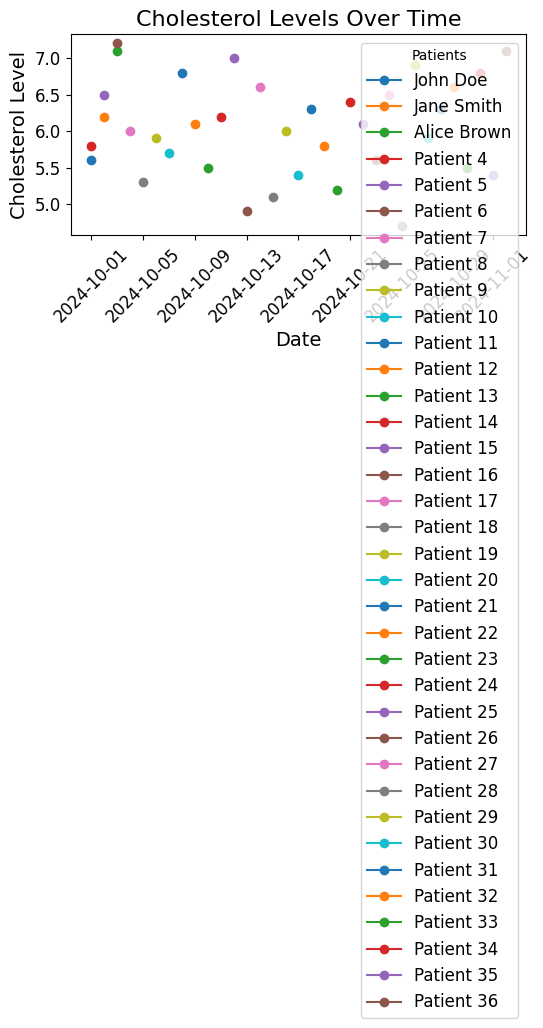

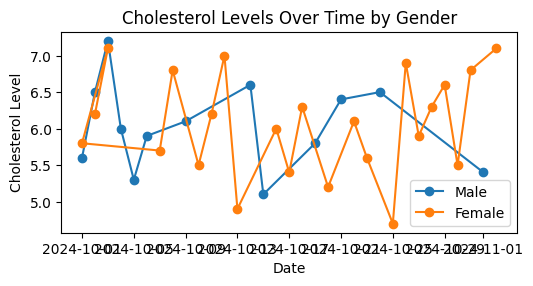

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
plt.subplot(4, 3, 2)
for gender in df['gender'].unique():
    patient_data = df[df['gender'] == gender]
    plt.plot(patient_data['date_of_record'], patient_data['cholesterol'], marker='o', label=gender)

plt.title('Cholesterol Levels Over Time by Gender')
plt.xlabel('Date')
plt.ylabel('Cholesterol Level')
plt.legend()


Text(0, 0.5, 'Frequency')

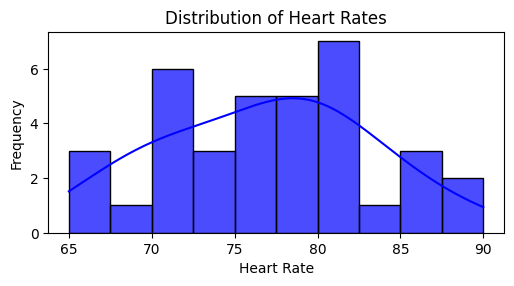

In [80]:
plt.figure(figsize=(20, 12))
plt.subplot(4, 3, 3)
sns.histplot(df['heart_rate'], bins=10, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Heart Rates')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')

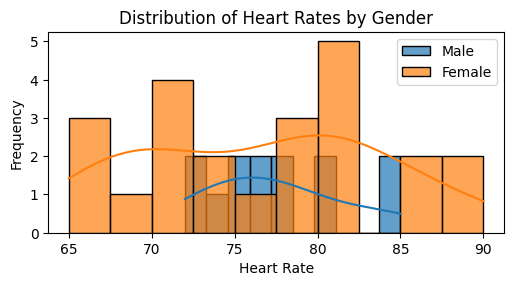

In [10]:
import seaborn as sns
plt.figure(figsize=(20, 12))
plt.subplot(4, 3, 3)
for gender in df['gender'].unique():
    patient_data = df[df['gender'] == gender]
    sns.histplot(patient_data['heart_rate'], bins=10, kde=True, label=gender, alpha=0.7)

plt.title('Distribution of Heart Rates by Gender')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

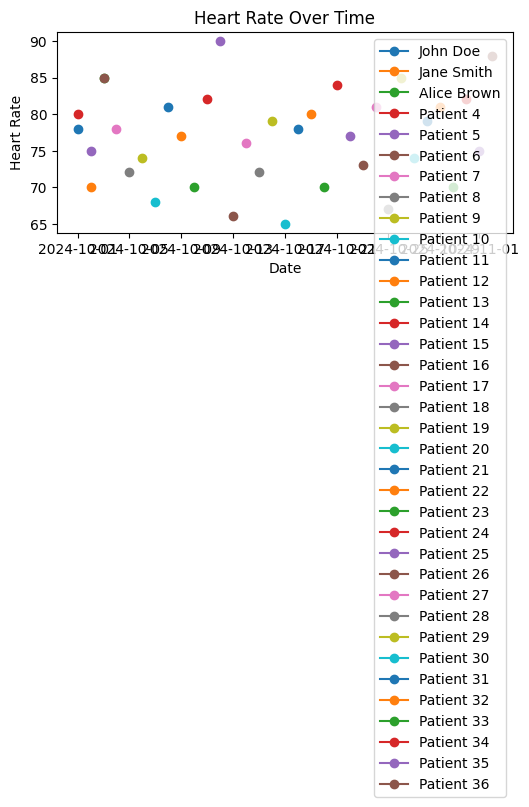

In [81]:
# Visualization 4: Heart Rate Over Time
plt.figure(figsize=(20, 12))
plt.subplot(4, 3, 4)
for name in df['name'].unique():
    patient_data = df[df['name'] == name]
    plt.plot(patient_data['date_of_record'], patient_data['heart_rate'], marker='o', label=name)

plt.title('Heart Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.legend()

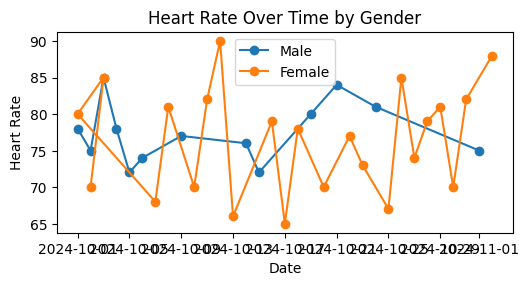

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(4, 3, 4)
for gender in df['gender'].unique():
    patient_data = df[df['gender'] == gender]
    plt.plot(patient_data['date_of_record'], patient_data['heart_rate'], marker='o', label=gender)

plt.title('Heart Rate Over Time by Gender')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.legend()

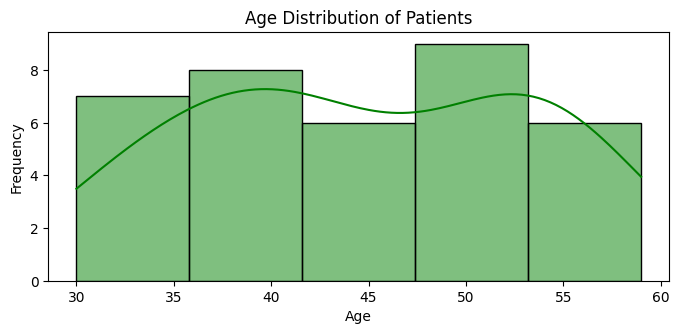

In [82]:
# Visualization 5: Age Distribution
plt.figure(figsize=(20, 12))
plt.subplot(4, 3, 5)
sns.histplot(df['age'], bins=5, color='green', kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

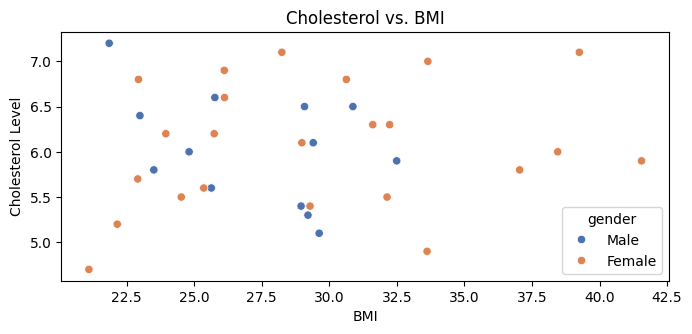

In [83]:
# Visualization 6: Cholesterol vs. BMI
plt.figure(figsize=(20, 12))
plt.subplot(4, 3, 6)
sns.scatterplot(x='bmi', y='cholesterol', data=df, hue='gender', palette='deep')
plt.title('Cholesterol vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Cholesterol Level')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Heart Rate')

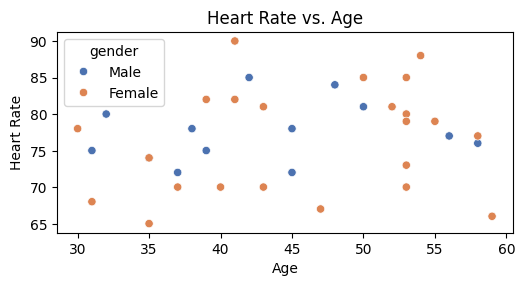

In [84]:
# Visualization 7: Heart Rate vs. Age
plt.figure(figsize=(20, 12))
plt.subplot(4, 3, 7)
sns.scatterplot(x='age', y='heart_rate', data=df, hue='gender', palette='deep')
plt.title('Heart Rate vs. Age')
plt.xlabel('Age')
plt.ylabel('Heart Rate')

([<matplotlib.axis.XTick at 0x1d53c4258b0>,
 [Text(0, 0, 'Systolic'), Text(1, 0, 'Diastolic')])

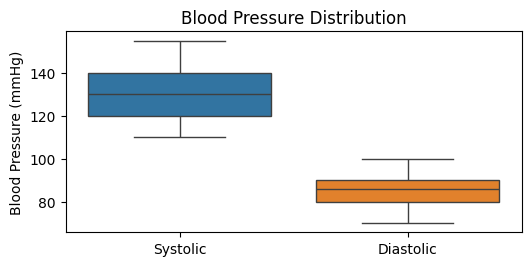

In [85]:
# Visualization 8: Blood Pressure Analysis
# Convert blood pressure to separate systolic and diastolic columns for analysis
plt.figure(figsize=(20, 12))
df[['systolic', 'diastolic']] = df['blood_pressure'].str.split('/', expand=True).astype(int)
plt.subplot(4, 3, 8)
sns.boxplot(data=df[['systolic', 'diastolic']])
plt.title('Blood Pressure Distribution')
plt.ylabel('Blood Pressure (mmHg)')
plt.xticks([0, 1], ['Systolic', 'Diastolic'])

C:\Users\anish rane\AppData\Local\Temp\ipykernel_16872\961257994.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='bmi', data=df, palette='pastel')


Text(0, 0.5, 'BMI')

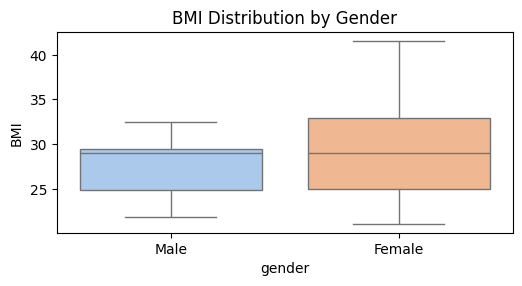

In [86]:
# Visualization 9: BMI Distribution by Gender
plt.figure(figsize=(20, 12))
plt.subplot(4, 3, 9)
sns.boxplot(x='gender', y='bmi', data=df, palette='pastel')
plt.title('BMI Distribution by Gender')
plt.ylabel('BMI')

C:\Users\anish rane\AppData\Local\Temp\ipykernel_16872\1925240386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='cholesterol', data=df, palette='pastel')


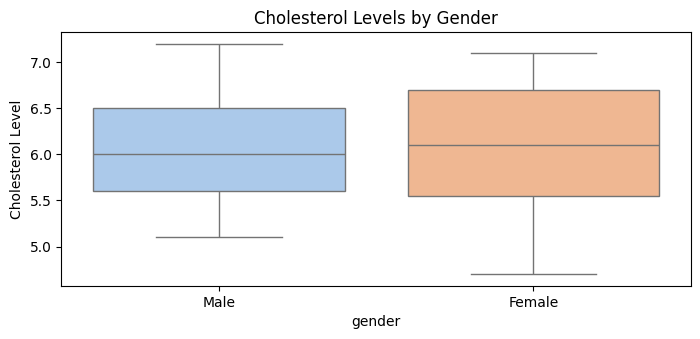

In [87]:
# Visualization 10: Cholesterol Levels by Gender
plt.figure(figsize=(20, 12))
plt.subplot(4, 3, 10)
sns.boxplot(x='gender', y='cholesterol', data=df, palette='pastel')
plt.title('Cholesterol Levels by Gender')
plt.ylabel('Cholesterol Level')

plt.tight_layout()
plt.show()

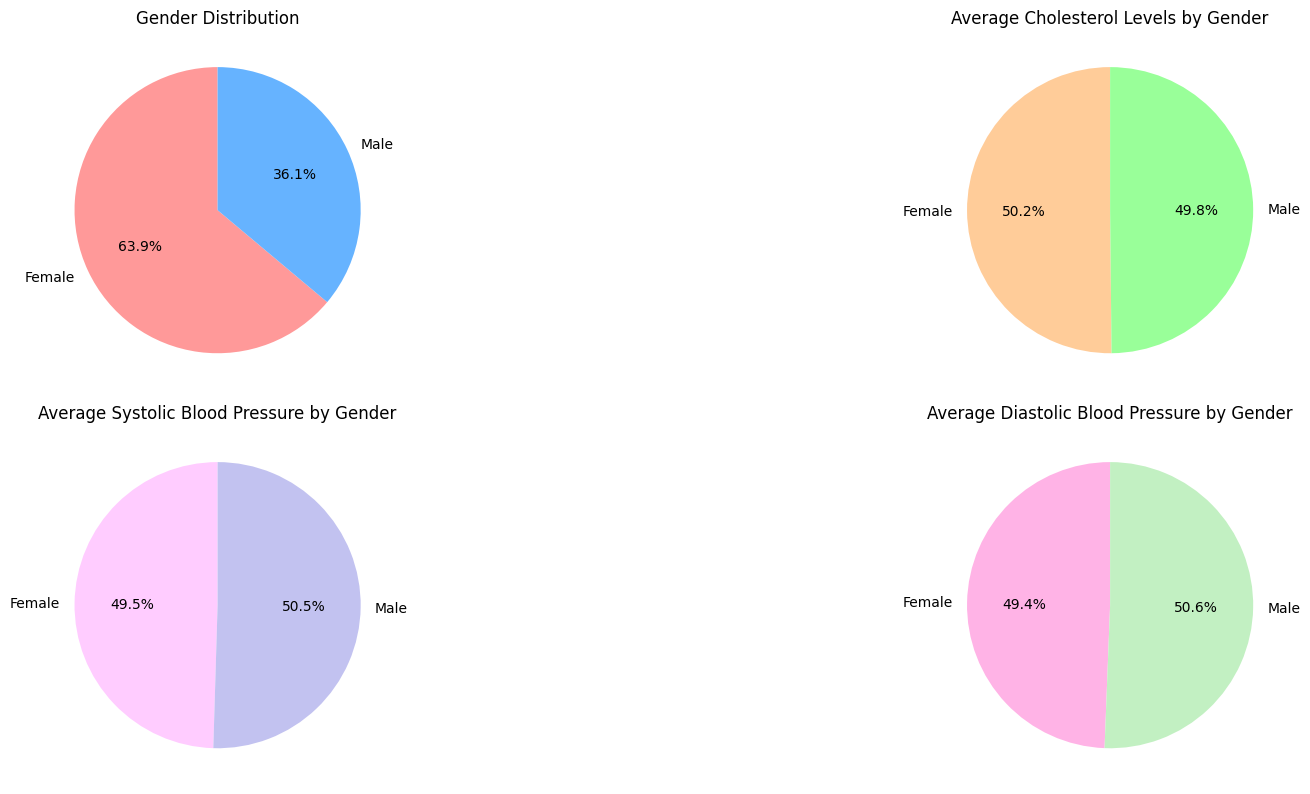

In [88]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already fetched your DataFrame `df` from the database as shown earlier

# 1. Count the number of males and females
gender_counts = df['gender'].value_counts()

# 2. Calculate average cholesterol and blood pressure by gender
# Convert blood pressure from string to two separate columns for systolic and diastolic
df[['systolic', 'diastolic']] = df['blood_pressure'].str.split('/', expand=True).astype(int)

average_cholesterol = df.groupby('gender')['cholesterol'].mean()
average_blood_pressure = df.groupby('gender')[['systolic', 'diastolic']].mean()

# 3. Plotting
plt.figure(figsize=(18, 12))

# Pie chart for Gender Distribution
plt.subplot(3, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')

# Pie chart for Average Cholesterol Levels
plt.subplot(3, 2, 2)
plt.pie(average_cholesterol, labels=average_cholesterol.index, autopct='%1.1f%%', startangle=90, colors=['#ffcc99','#99ff99'])
plt.title('Average Cholesterol Levels by Gender')

# Pie chart for Average Blood Pressure (Systolic)
plt.subplot(3, 2, 3)
plt.pie(average_blood_pressure['systolic'], labels=average_blood_pressure.index, autopct='%1.1f%%', startangle=90, colors=['#ffccff','#c2c2f0'])
plt.title('Average Systolic Blood Pressure by Gender')

# Pie chart for Average Blood Pressure (Diastolic)
plt.subplot(3, 2, 4)
plt.pie(average_blood_pressure['diastolic'], labels=average_blood_pressure.index, autopct='%1.1f%%', startangle=90, colors=['#ffb3e6','#c2f0c2'])
plt.title('Average Diastolic Blood Pressure by Gender')

plt.tight_layout()  # Automatically adjust subplot parameters for a clean layout
plt.show()


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Convert categorical gender column to numeric (0 for Female, 1 for Male)
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # 0 for Female, 1 for Male

# Step 1: Categorize cholesterol levels
# Example: Normal < 200, Borderline 200-239, High >= 240
def categorize_cholesterol(value):
    if value < 200:
        return 'Normal'
    elif 200 <= value < 240:
        return 'Borderline'
    else:
        return 'High'

df['cholesterol_category'] = df['cholesterol'].apply(categorize_cholesterol)

# Convert cholesterol categories to numerical labels
le = LabelEncoder()
df['cholesterol_category'] = le.fit_transform(df['cholesterol_category'])

# Step 2: Define the features (X) and target (y)
X = df[['age', 'bmi', 'gender', 'heart_rate', 'systolic', 'diastolic']]
y = df['cholesterol_category']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the model (RandomForestClassifier for classification)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 7: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Step 8: Classification report for detailed metrics
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 100.00%
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [56]:
# Step 1: Find Alice's data in the DataFrame
alice_data = df[df['name'] == 'Alice Brown']

if alice_data.empty:
    print("Alice's data not found in the dataset.")
else:
    # Step 2: Select relevant features for prediction (same as used for training)
    X_alice = alice_data[['age', 'bmi', 'gender', 'heart_rate', 'systolic', 'diastolic']]

    # Step 3: Apply the same preprocessing (scaling)
    X_alice_scaled = scaler.transform(X_alice)

    # Step 4: Make the prediction
    alice_prediction = model.predict(X_alice_scaled)

    # Step 5: Convert the numeric prediction back to the category (Normal, Borderline, High)
    predicted_category = le.inverse_transform(alice_prediction)

    print(f"Alice's predicted cholesterol category: {predicted_category[0]}")


Alice's predicted cholesterol category: Normal


In [57]:
# Step 1: Ensure you are using the correct features (including 'systolic' and 'diastolic') for training and prediction
X_bp = df[['age', 'bmi', 'gender', 'heart_rate', 'systolic', 'diastolic']]
y_bp = df['blood_pressure_category']

# Step 2: Split the data into training and testing sets
X_train_bp, X_test_bp, y_train_bp, y_test_bp = train_test_split(X_bp, y_bp, test_size=0.2, random_state=42)

# Step 3: Train the RandomForestClassifier (or another model)
model_bp = RandomForestClassifier(random_state=42)
model_bp.fit(X_train_bp, y_train_bp)

# Step 4: Make predictions on Alice Brown's blood pressure category
alice_data = df[df['name'] == 'Alice Brown']

if alice_data.empty:
    print("Alice Brown's data not found in the dataset.")
else:
    # Ensure that the features for Alice's prediction match those used during training
    X_alice_bp = alice_data[['age', 'bmi', 'gender', 'heart_rate', 'systolic', 'diastolic']]
    
    # Scale the features (if scaling was applied earlier)
    X_alice_bp_scaled = scaler.transform(X_alice_bp)

    # Predict blood pressure category
    alice_bp_prediction = model_bp.predict(X_alice_bp_scaled)

    # Convert the prediction back to the original category
    predicted_bp_category = le_bp.inverse_transform(alice_bp_prediction)
    
    print(f"Alice Brown's predicted blood pressure category: {predicted_bp_category[0]}")


KeyError: 'blood_pressure_category'

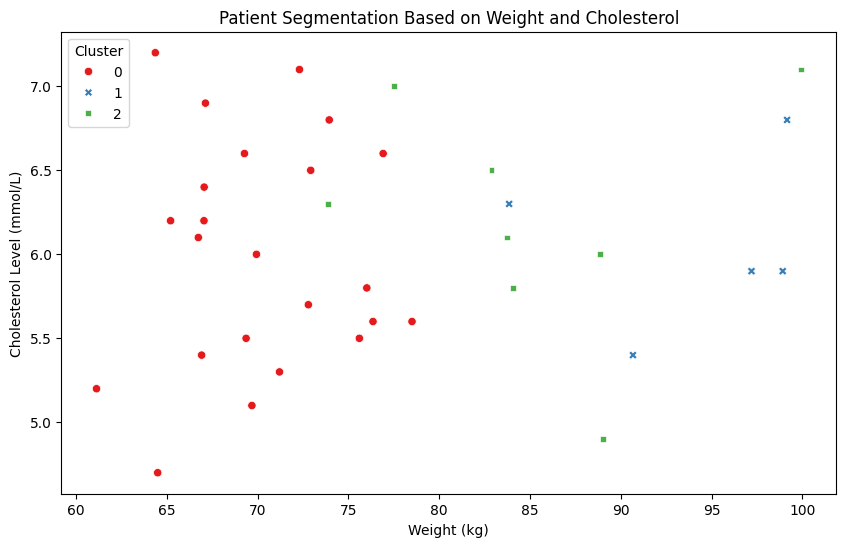

In [58]:
import mysql.connector
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate BMI for each patient
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Step 4: Prepare data for clustering
features = df[['age', 'weight', 'cholesterol', 'bmi']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Step 6: Visualize Segmentation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='cholesterol', hue='cluster', data=df, palette='Set1', style='cluster')
plt.title('Patient Segmentation Based on Weight and Cholesterol')
plt.xlabel('Weight (kg)')
plt.ylabel('Cholesterol Level (mmol/L)')
plt.legend(title='Cluster')
plt.show()



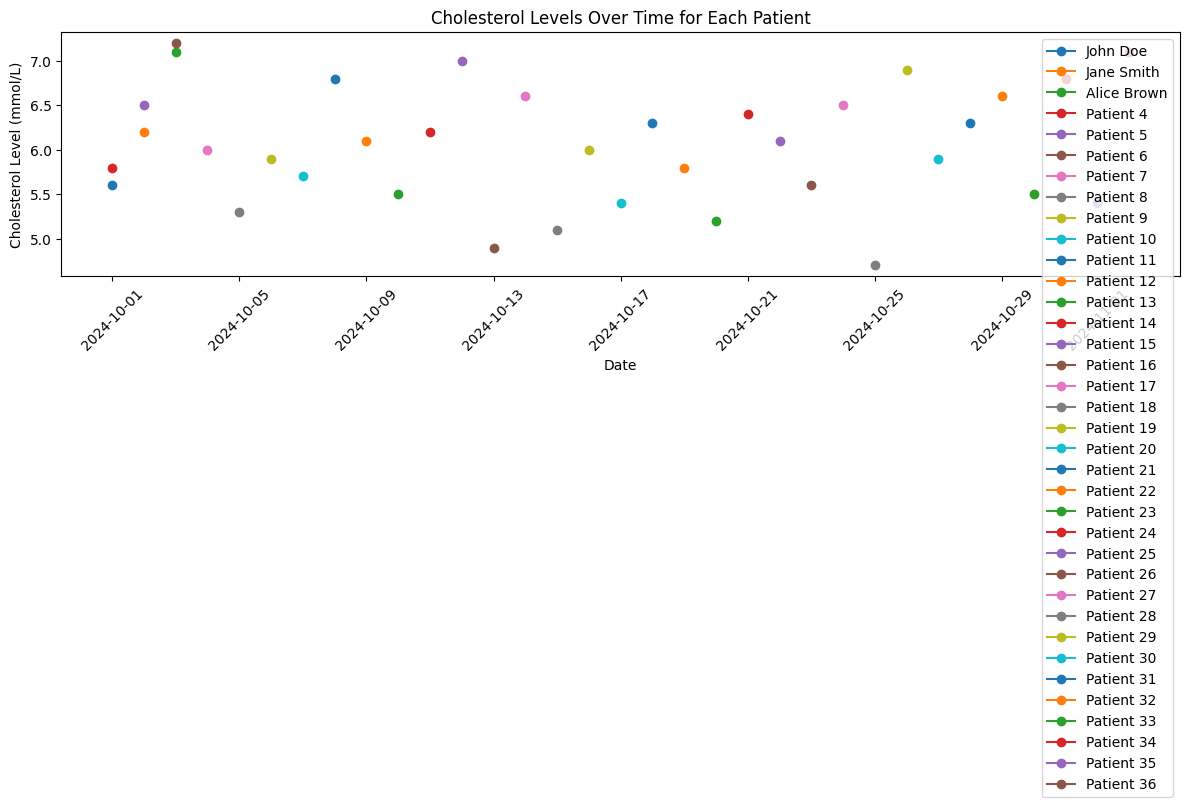

In [59]:

# Convert 'date_of_record' to datetime
df['date_of_record'] = pd.to_datetime(df['date_of_record'])

# Step 4: Plot Cholesterol Levels Over Time for Each Patient
plt.figure(figsize=(12, 6))
for name in df['name'].unique():
    patient_data = df[df['name'] == name]
    plt.plot(patient_data['date_of_record'], patient_data['cholesterol'], marker='o', label=name)

plt.title('Cholesterol Levels Over Time for Each Patient')
plt.xlabel('Date')
plt.ylabel('Cholesterol Level (mmol/L)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\anish rane\AppData\Local\Temp\ipykernel_16872\2767418179.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='conditions', palette='viridis')


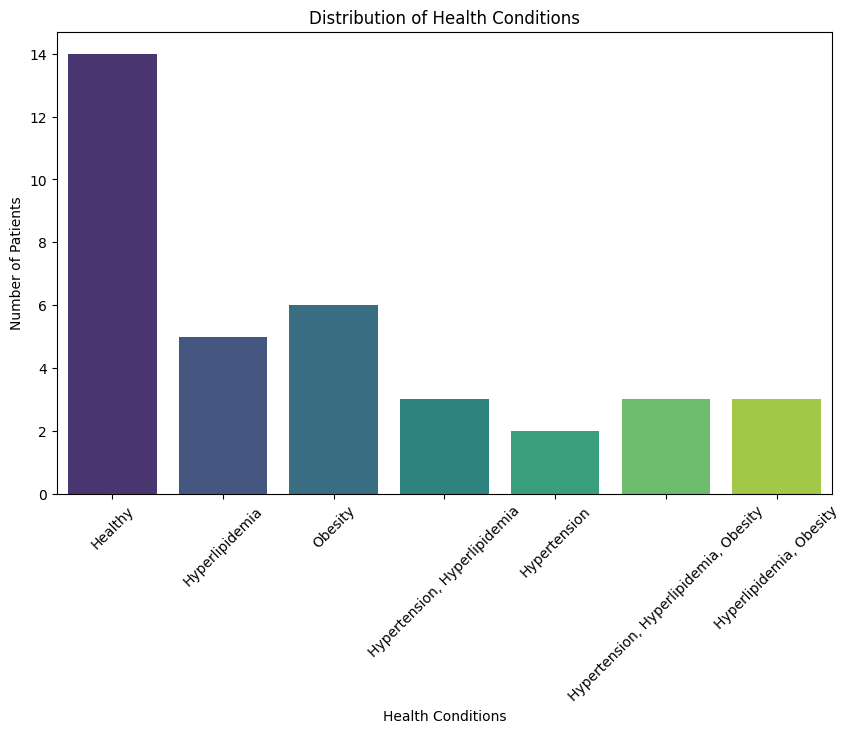

In [90]:
import numpy as np
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already fetched your DataFrame `df` from the database

# Define conditions based on thresholds
def label_conditions(row):
    conditions = []
    if row['systolic'] > 140 or row['diastolic'] > 90:
        conditions.append('Hypertension')
    if row['cholesterol'] > 6.2:
        conditions.append('Hyperlipidemia')
    if row['bmi'] > 30:
        conditions.append('Obesity')
    return ', '.join(conditions) if conditions else 'Healthy'

# Apply function to label conditions
df['conditions'] = df.apply(label_conditions, axis=1)

# Visualize conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='conditions', palette='viridis')
plt.title('Distribution of Health Conditions')
plt.xlabel('Health Conditions')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()


In [91]:

# Prepare data for prediction
X = df[['age', 'weight', 'height', 'cholesterol', 'systolic', 'diastolic']]
X['bmi'] = X['weight'] / ((X['height'] / 100) ** 2)
X['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)  # Convert gender to binary
y = df['conditions'].apply(lambda x: 1 if 'Hypertension' in x else 0)  # Label for prediction

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Hypertension Prediction: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))



C:\Users\anish rane\AppData\Local\Temp\ipykernel_16872\2756909832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bmi'] = X['weight'] / ((X['height'] / 100) ** 2)
C:\Users\anish rane\AppData\Local\Temp\ipykernel_16872\2756909832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)  # Convert gender to binary
C:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

Accuracy of Hypertension Prediction: 75.00%
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.50      0.50      0.50         2

    accuracy                           0.75         8
   macro avg       0.67      0.67      0.67         8
weighted avg       0.75      0.75      0.75         8



In [92]:
# Predicting for a new patient (example)
new_patient = pd.DataFrame({
    'age': [45],
    'weight': [85],
    'height': [175],
    'cholesterol': [6.5],
    'systolic': [150],
    'diastolic': [95]
})
new_patient['bmi'] = new_patient['weight'] / ((new_patient['height'] / 100) ** 2)
new_patient['gender'] = 1  # Assuming Male

# Predict disease risk
risk_prediction = model.predict(new_patient)
print(f'Predicted Risk of Hypertension for New Patient: {"Yes" if risk_prediction[0] == 1 else "No"}')


Predicted Risk of Hypertension for New Patient: Yes


In [93]:
# Clean up and close connection
cursor.close()
db_connection.close()


Error: Already closed